# Машинное обучение, DS-поток, осень 2022
## Задание 3.1


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 100 баллов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
sns.set(palette='Set2')
from datetime import datetime
from sklearn.preprocessing import StandardScaler

### Задача 1 

Докажите, что в методе k-means кластеры образуют выпуклые множества. Выполняется ли данное свойство для кластеров, определеяемых гауссовской смесью? Под кластером имеется в виду область пространства признаков.

Пусть А - центр одного класстера точки B и C  ему принадлежат. Необходимо доказать, что для любой точки D, лежащей между B и С, D принадлежит A. Предположим противное, тоесть существует точка D, такая, что ED < AD. Выберем точку D, ближайшую к Е. Тогда BDE - прямой.

![](1.jpeg)

![](2.jpeg)

![](3.jpeg)

![](4.jpeg)

Противоречие, ЧТД.!

### Задача 2 
Проведите свое исследование датасета из `data.txt` на кластеризацию изученными методами, реализованными в sklearn:

- k-means;
- DBSCAN;
- Иерархическая кластеризация.

Для каждого метода выше обоснуйте, почему выбранные вами гиперпараметры оптимальны, исходя из внутренней структуры данных. Если вы не можете применить какой-то из методов на этих данных, то обоснуйте, почему.

*Примечание.* Задача является небольшим упражнением и не предполагает большое исследование.

In [2]:
data = np.loadtxt('data.txt')

Визуализируем точки, дабы лучше понимать что нас ждет.

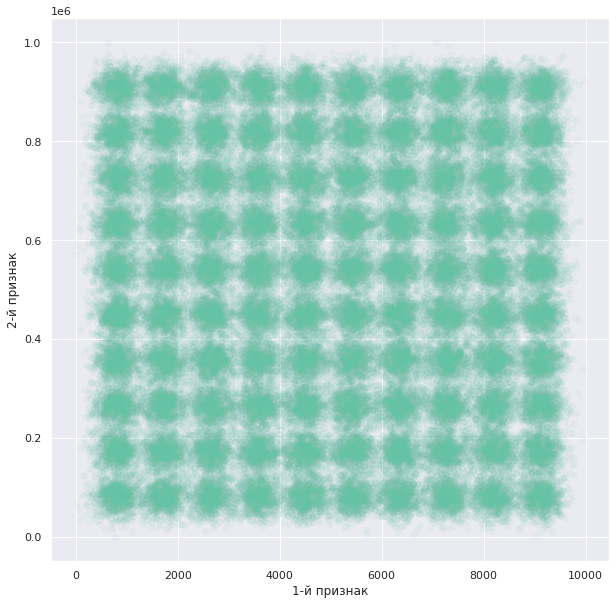

In [3]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], alpha=0.05)
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

Очевидно, 100 кластеров. Вычислим их центры и нарисуем их. Перед этим нормализовав данные

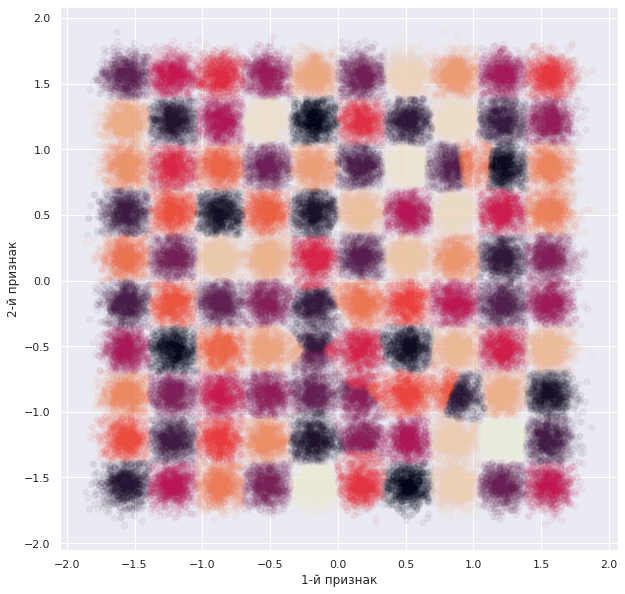

In [4]:
new_data = StandardScaler().fit_transform(data)
kmeans = KMeans(100)
kmeans.fit(new_data)
y_pred = kmeans.predict(new_data)
fig = plt.figure(figsize=(10, 10))
plt.scatter(new_data[:, 0], new_data[:, 1], c=y_pred, alpha=0.05)
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

Очень хорошо кластеризованные данные.

Давайте посмотрим DBSCAN. В данной конфигурации он должен себя не плохо показать.

Характерный радиус системы порядка $0.1$.Из предположения что в каждом кластере примерно одинаковое число точек найдем характерное количество точек

In [5]:
new_data.shape

(100000, 2)

Считаем, что в каждом кластере порядка 1000 точек

In [ ]:
y_pred = DBSCAN(eps=0.5 , min_samples=1000).fit_predict(new_data)
fig = plt.figure(figsize=(10, 10))
plt.scatter(new_data[:, 0], new_data[:, 1], c=y_pred, alpha=0.05)
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

Очевидно, что нам хотелось-бы чего-то другово. Кажеться, что результат лучше не получить так как характерное расстояние между класстерами намного меньше их радиусов.

Чтож посмотрим на последнйи алгоритм

In [20]:
agglomerat = AgglomerativeClustering(n_clusters=100).fit(data)
#y_pred = agglomerat.predict(new_data)
#fig = plt.figure(figsize=(10, 10))
#plt.scatter(data[:, 0], data[:, 1], c=y_pred, alpha=0.05)
#plt.xlabel('1-й признак')
#plt.ylabel('2-й признак');

MemoryError: Unable to allocate 37.3 GiB for an array with shape (4999950000,) and data type float64

Какая-то ерись. Вобщем я так и не понял почему он хочет 37 гигов скушать, если вы знаетет почему, и как это чинить отпишитесь пожалуйста. На стековерфлоу пишут, что так и должно быть, но я им чет не верю.

### Задача 3
Скачайте <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">данные</a> о клиентах некоторой торговой сети.

Цель задачи &mdash; кластеризовать клиентов с целью модификации продукта под разные типы пользовательских кластеров. Например, вместо того, чтобы тратиться на продвижение нового продукта каждому клиенту, можно продавать продукт только в том кластере, где клиенты с наибольшей вероятностью его купят.

In [87]:
data = pd.read_csv("./marketing_campaign.csv", sep="\t")
old_data_shape = data.shape
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Посмотрим на признаки. Прочитайте также информацию о признаках на странице данных.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Посмотрим на диапазон дат регистрации

In [89]:
data["Dt_Customer"].min(), data["Dt_Customer"].max()

('01-01-2013', '31-12-2013')

Кажется, данные выгружены в конце 2014 года, соответственно, определим дату анализа

In [90]:
end_date = pd.Timestamp('2015-01-01')

Посчитаем для каждого клиента количество дней с момента регистрации

In [91]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["usage_time"] = (end_date - data["Dt_Customer"]) / pd.Timedelta('1 day')
data["usage_time"]

<ipython-input-91-65064d351ad0>:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-91-65064d351ad0>:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-91-65064d351ad0>:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-91-65064d351ad0>:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-91-65064d351ad0>:1: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY forma

0       997.0
1       151.0
2       498.0
3        91.0
4       347.0
        ...  
2235    567.0
2236     87.0
2237    341.0
2238    342.0
2239    808.0
Name: usage_time, Length: 2240, dtype: float64

Создайте следующие признаки:
* возраст клиента на основе даты рождения
* сумма покупок по всем категориям
* общее количество детей, сложив `Kidhome` и `Teenhome`
* на основе количества детей и семейного положения (`Marital_Status`) определите *предполагаемый* размер семьи
* средние траты клиента в день в период пользования сервисом, поделив суммарные траты на количество дней от даты регистрации (*см. примечание далее*)

In [92]:
data['age'] = end_date - pd.to_datetime(data['Year_Birth'].astype(str) + '/01/01')
data['age'] = (data['age'].dt.days/365).astype(int)
data['expends'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['child'] = data['Kidhome'] + data['Teenhome']

Теперь попробуем посмотреть какие впринципе семейные положения возможны

In [93]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [94]:
replace_dict = {'Married' : 2, 'Together' : 2 , 'Single' : 1, 'Divorced' : 1, 'Widow' : 1, 'Alone' : 1, 'Absurd' : 1, 'YOLO' : 1}
data['count_fam_mem'] = data['Marital_Status'].replace(replace_dict) + data['child']

*Примечание.* 

Клиент может перестать пользоваться сервисом спустя какое-то время, поэтому корректнее было бы делить на время пользования сервисом. В данных не сказано о том, в каких случаях клиента можно отнести в отток, а так же не указан принцип выгрузки данных (все клиенты или только активные), но имеется признак `Recency` &mdash; количество дней с момента последней покупки клиента. 

Исследуйте этот признак и попробуйте понять, можно ли из данных сделать вывод о том, какие типы клиентов присутствуют в данных, каких клиентов можно отнести в отток. Если это сделать удалось, то при вычислении средних трат клиента в день делить нужно на количество дней использования сервиса в случае, если клиент попал в отток. Если клиент активен, то мы считаем, что он до сих пор пользуется сервисом, даже если последнюю покупку он совершал несколько дней назад.

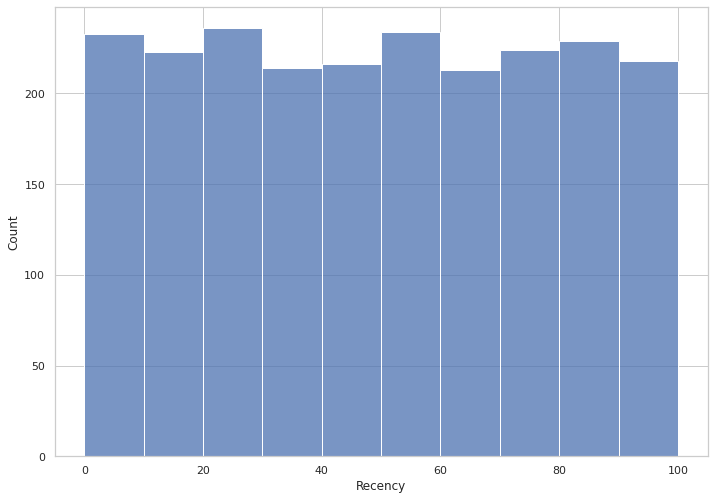

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x="Recency", binwidth=10);

Все боле-мене равномерно. Так как Как правило нужды людей достаточно периодичны, то людей не закупавшихся у нас более месяца будем считать выпавшими.

In [96]:
data['boll_flag'] = (data['Recency'] > 30).astype(int)
data["usage_time"] = data["usage_time"] - data['boll_flag'] * data['Recency']
data['av_expends'] = data['expends'] / data['usage_time']

Далее будем работать с признаками:
* возраст клиента
* предполагаемый размер семьи
* средние траты клиента в день
* `Income` &mdash; годовой доход клиента

Проведите графическое исследование признаков. При необходимости выполните предобработку, обосновав ее необходимость.

In [97]:
data = data[['age', 'count_fam_mem', 'av_expends', 'Income']]
data

,age,count_fam_mem,av_expends,Income
0,58,1,1.722045,58138.0
1,61,3,0.238938,46344.0
2,50,2,1.558233,71613.0
3,31,3,0.582418,26646.0
4,34,3,1.667984,58293.0
...,...,...,...,...
2235,48,3,2.573896,61223.0
2236,69,5,14.322581,64014.0
2237,34,1,4.964000,56981.0
2238,59,3,2.464912,69245.0


Посмотрим на доход в зависимости от возраста

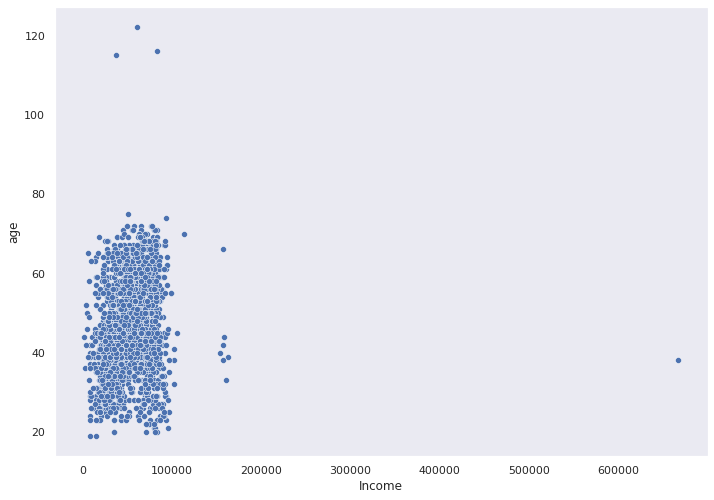

In [98]:
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age");

Очевидно, что люди с ЗП больше 140000 и  старше 80 это выбросы. Удалим их.

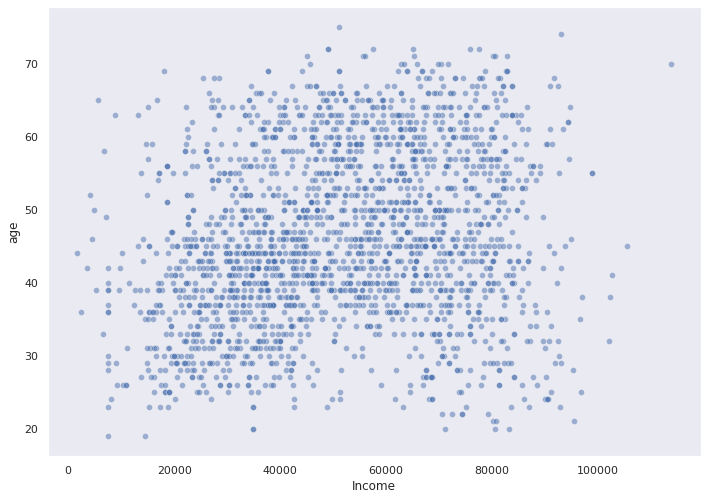

In [99]:
data = data.where(data['age'] < 80).dropna()
data = data.where(data['Income'] < 140000).dropna()
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age", alpha=0.5 );

Теперь посмотрим на зависимость расхода от количества членов семьи.

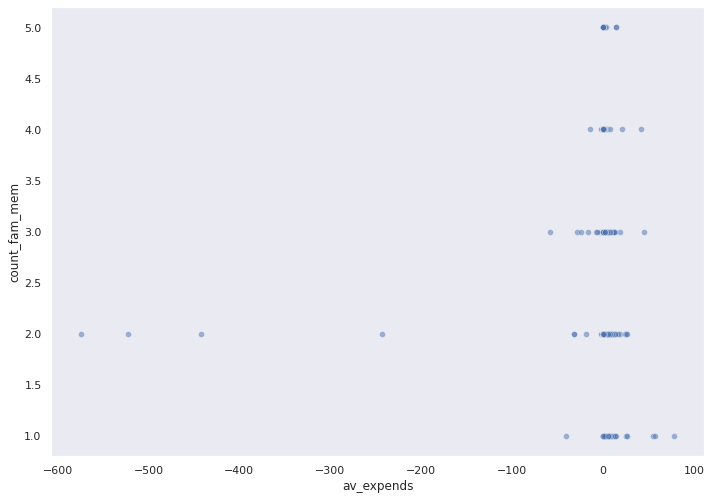

In [100]:
sns.set_style('dark')
sns.scatterplot(data=data, x="av_expends", y="count_fam_mem", alpha=0.5);

Понятно, что люди с отрицательным рассходом это бред, вызванный не точностью данных, и люди тратящие больше 250 тоже выброс. Избавим наши данные от них.

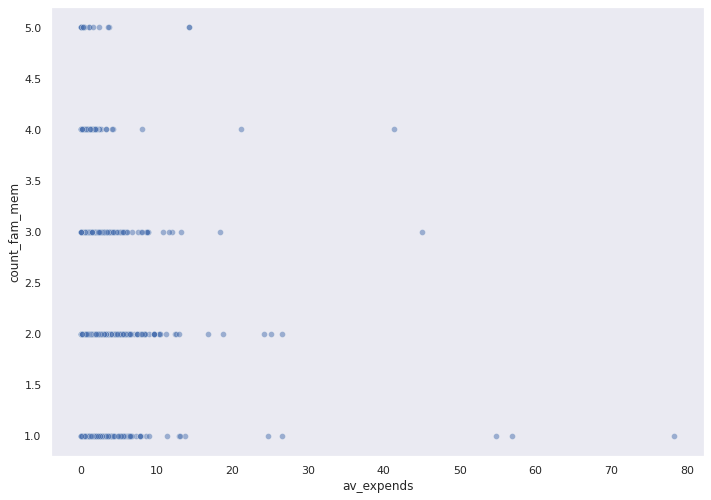

In [101]:
data = data.where(data['av_expends'] < 250).dropna()
data = data.where(data['av_expends'] > 0).dropna()
sns.set_style('dark')
sns.scatterplot(data=data, x="av_expends", y="count_fam_mem", alpha=0.5);

Узнаем сколько лишнего мы удалили

In [102]:
print('Было', old_data_shape[0], 'стало', data.shape[0], 'В процентах данных потеряно', 100 * (old_data_shape[0] - data.shape[0])/ old_data_shape[0])

Было 2240 стало 2183 В процентах данных потеряно 2.544642857142857


Значит 2.5 % данных мы списали на выбросы. Ну в общем и целом норм.

Пока, что ни на одном из графиков не видно ни каких кластеров. Давайте попробуем посмотреть на зависимость трат от дохода.

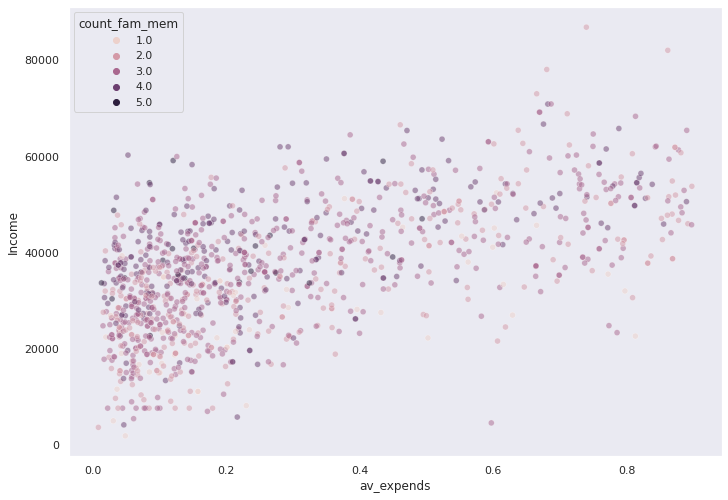

In [103]:
new_data = data.where(data['av_expends'] < 0.9).dropna()
sns.scatterplot(data=new_data, x="av_expends", y="Income", hue="count_fam_mem", alpha=0.5);

Нормируем все данные к еденице. 

In [104]:
data['Income'] = data['Income'] / 100000
data['age'] = data['age'] / 70
data['av_expends'] = data['av_expends'] / 80
data['count_fam_mem'] = data['count_fam_mem'] / 5

Есть ли в полученных данных пропуски? Если да, то насколько много, можно ли их удалить?

Если я не ошибаюс, то в условии каждого из полей стоит NotNan. Так что пропусков быть не должно.

Перейдем к кластеризации клиентов. Какой метод кластеризации будете использовать и почему? Как определить оптимальное количество кластеров или, в зависимости от метода, других гиперпараметров?

Я вижу класстер на диограмме age income. Там из 3 штуки. Попробуем достать их k-meansom

Выполните кластеризацию этим методом и подберите оптимальное количество гиперпараметров.

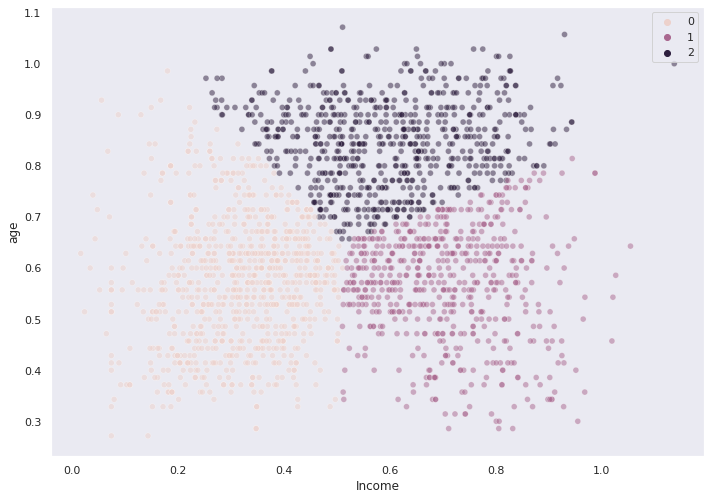

In [105]:
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans.fit(data[['age', 'Income']])
y_pred = kmeans.predict(data[['age', 'Income']])
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age", hue=y_pred, alpha=0.5);

Немного не то, чего я хотел. Попробуем сделать 2 кластера и 4.

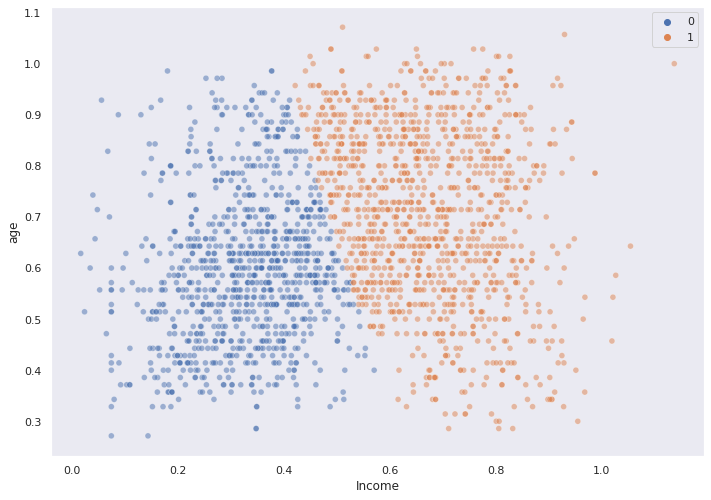

In [106]:
kmeans = KMeans(n_clusters=2, random_state=15)
kmeans.fit(data[['age', 'Income']])
y_pred = kmeans.predict(data[['age', 'Income']])
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age", hue=y_pred, alpha=0.5);

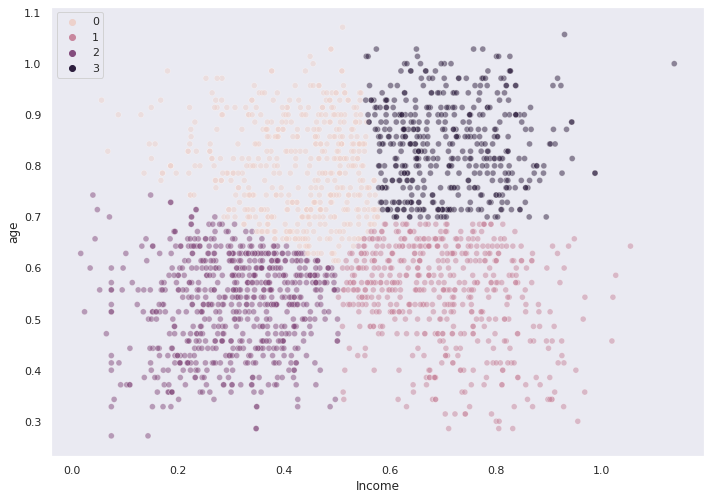

In [107]:
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(data[['age', 'Income']])
y_pred = kmeans.predict(data[['age', 'Income']])
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age", hue=y_pred, alpha=0.5);

 Вот 4 это то, чего я хотел. Посмотрим как это выглядит на других графиках

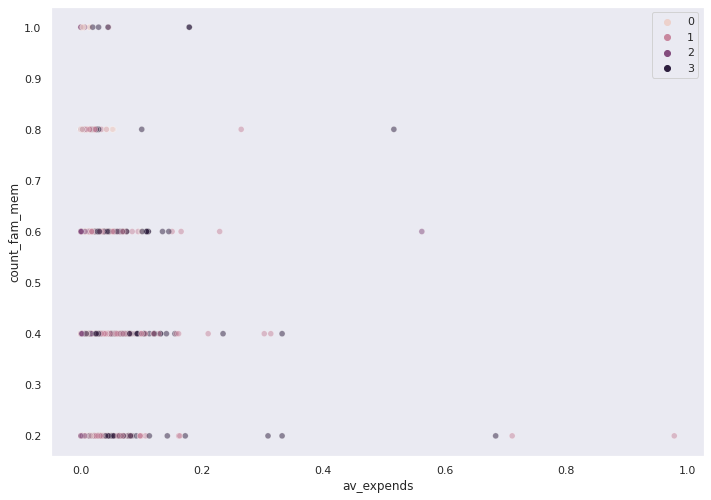

In [108]:
sns.scatterplot(data=data, x="av_expends", y="count_fam_mem", hue=y_pred, alpha=0.5);

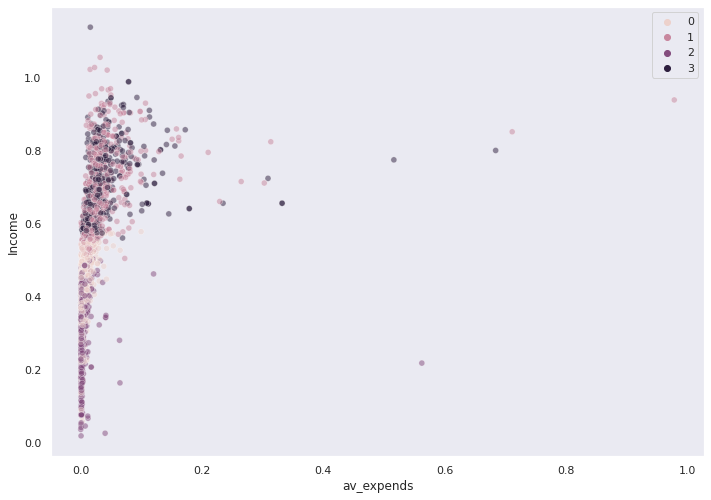

In [109]:
sns.scatterplot(data=data, x="av_expends", y="Income", hue=y_pred, alpha=0.5);

Да. Чет как-то не очень. Давайте попробуем поискать 4 кластера на всех данных может будет по лучше

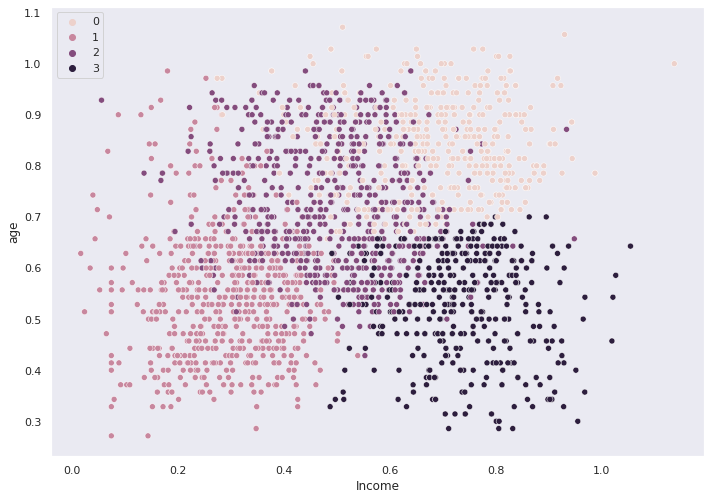

In [110]:
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(data)
y_pred = kmeans.predict(data)
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age", hue=y_pred, alpha=1);

Хорошо. Давайте посмотрим на наши кластеры в других проэкциях.

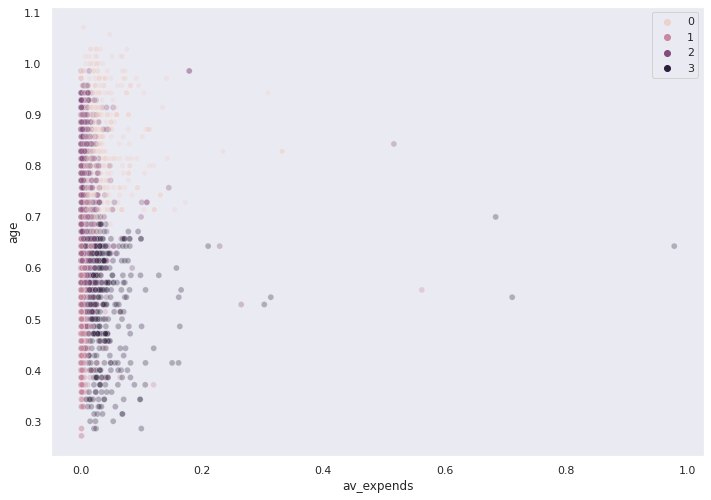

In [114]:
sns.scatterplot(data=data, x="av_expends", y="age", hue=y_pred, alpha=0.3);

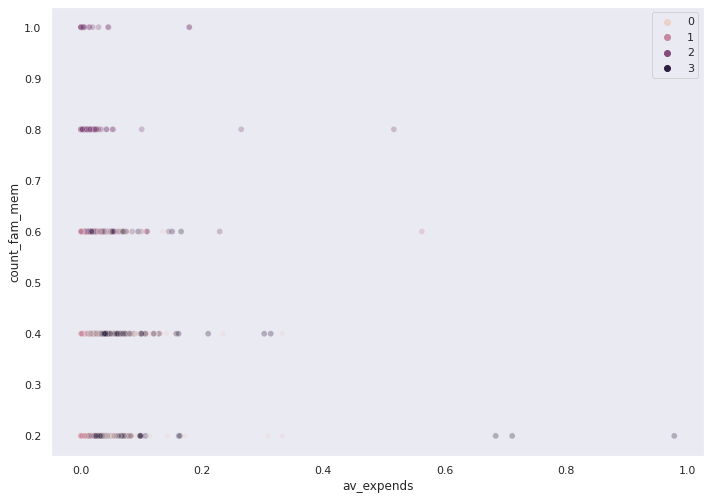

In [115]:
sns.scatterplot(data=data, x="av_expends", y="count_fam_mem", hue=y_pred, alpha=0.3);

Сколько элементов в каждом из полученных кластеров?

Проинтерпретируйте полученные кластеры с помощью визуального анализа. Используйте различные типы графиков (например, box plot), изученные ранее. По каким признакам кластеры различаются, на сколько? Как можно описать клиентов каждого кластера?

Насколько кластеры соприкасаются друг с другом? Что можно сказать про клиентов на границе кластеров?

Посчтиаем количество клиентов

In [121]:
data['claster'] = y_pred
data.groupby(['claster']).count()['age']

claster
0    443
1    648
2    707
3    385
Name: age, dtype: int64

из предыдущей визуализации видно, что 0 это старые и богатые 1 это молодые и бедные 2 это старые и бедные 3 это молодые и богатые

Попробуйте также применить другие изученные методы кластеризации. Насколько лучше или хуже получился результат?

Так как при использовании иерархической у меня все крашиться, то мне осталось проверить только DBSCAN. Но здесь он себя скорее всего очень плохо покажет так как кластеры отделены не пространственно, а скорее геометрически. Это две скрещивающихся линии. Однако давайте посмотрим.

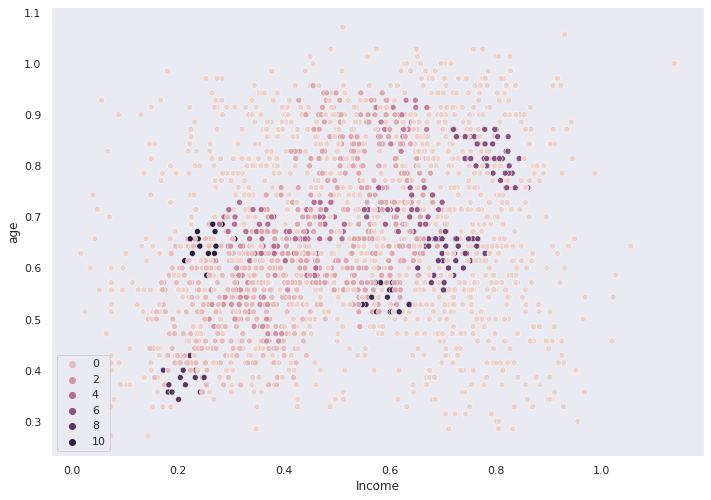

In [139]:
dbscan = DBSCAN(eps=0.05 , min_samples=19)
y_pred = dbscan.fit_predict(data)
sns.set_style('dark')
sns.scatterplot(data=data, x="Income", y="age", hue=y_pred, alpha=1);

Судя по всему этот эффект достигаеться из- за случайных флуктуаций плотности точек. Наврятли он несет в себе какую-то смысловую нагрузку.

Не забывайте про выводы.

Эх выводы не самые утешительные. Не смотря на то, что нам удалось в общем и целом кластеризовать имеющиесь у нас данные не совсем понятно как эьто делать в пространстве сколько-нибуть приличных размерностей.  И вопрос подбора гиппер параметров там встанет достаточно остро. Так же мне кажеться, что загрубление изначальных данных до всего 4-х столбоцв не совсем корректно. Кажеться, что для предложенного анализа более важна качественная наполненность корзины чем количесвтенная. Пройдя предложенным путем мы видем, что есть всего 4 категории граждан. Основное деление это по достатку и по возрасту.